In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [8]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_0_17")
#results_PQK = load_feather_folder_as_pd("../data/results/DE_0_24")
results_FQK = load_feather_folder_as_pd("../data/results/DE_0_27")
results_classical = load_feather_folder_as_pd("../data/results/DE_0_28")

['../data/results/DE_0_17\\0.feather', '../data/results/DE_0_17\\0_T.feather']
0.010558128356933594
['../data/results/DE_0_27\\0.feather']
0.008669853210449219
['../data/results/DE_0_28\\0.feather']
0.0039048194885253906


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [9]:
f_initial =  [np.cos(0), -np.sin(0)]
x_line = np.linspace(0, 2*3.14, 40)
f_odeint = odeint(mapping_of_derivatives_of_loss_functions["harmonic_oscillator"], f_initial, x_line[:])[:,0].flatten()

In [19]:
results_QNN["f_sol"][0]

array([ 0.69827307,  0.57099636,  0.42816011,  0.27365658,  0.11169596,
       -0.05330835, -0.21686001, -0.37450229, -0.52193945, -0.65515386,
       -0.77051546, -0.86488066, -0.93567802, -0.98097835, -0.9995472 ,
       -0.99087859, -0.95520872, -0.89350961, -0.80746253, -0.69941225])

In [23]:
results_QNN["f_sol"][1].shape

(20,)

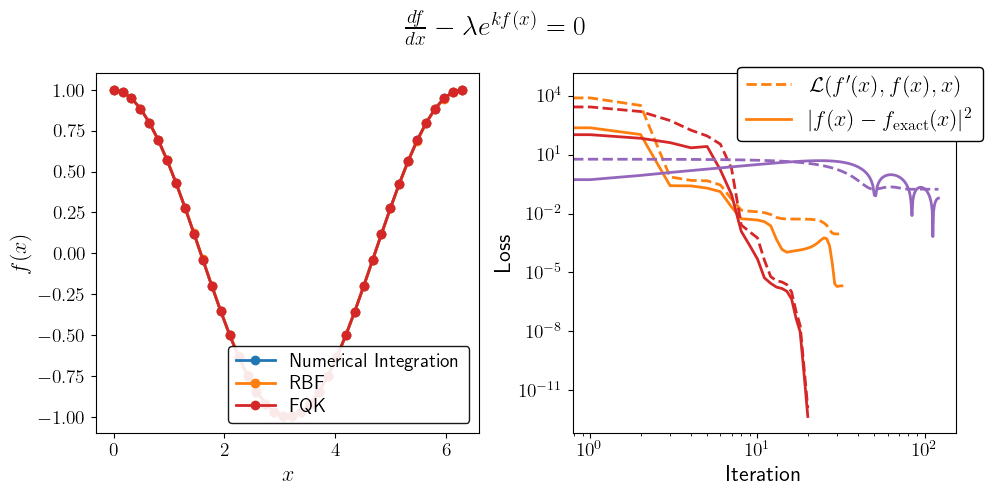

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


x_span_plot = x_line
ax1.plot(x_span_plot, f_odeint,"-o", label="Numerical Integration", color="C0", linewidth=2)
#ax1.plot(x_span_plot, np.log(x_span_plot), "-", label="Log(x)", color="black", linewidth=2)
ax1.plot(x_span_plot, results_classical["f_sol"][0], "-o", label="RBF", color="C1", linewidth=2)
ax1.plot(x_span_plot, results_PQK["f_sol"][0], "-o", label="PQK", color="C2", linewidth=2)
ax1.plot(x_span_plot, results_FQK["f_sol"][0], "-o", label="FQK", color="C3", linewidth=2)
#ax1.plot(x_span_plot, results_QNN["f_sol"][0], "-o", label="QNN", color="C4", linewidth=2)
#plt.ylim(-3, 3)


ax1.legend()


#ax2 is for the errors
ax2.plot(results_classical["loss_history"][0], color="C1", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot(results_classical["mse_history"][0],  color="C1", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)


#ax2.plot(results_PQK["loss_history"][0], color="C2", linestyle="--", linewidth=2)
#ax2.plot(results_PQK["mse_history"][0],  color="C2", linewidth=2)

ax2.plot(results_FQK["loss_history"][0], color="C3", linestyle="--", linewidth=2)
ax2.plot(results_FQK["mse_history"][0],  color="C3", linewidth=2)

ax2.plot(results_QNN["loss_history"][0], color="C4", linestyle="--", linewidth=2)
ax2.plot(results_QNN["mse_history"][0],  color="C4", linewidth=2)







ax1.legend(fontsize=14, loc="lower right", edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)


plt.suptitle(r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$", fontsize=20)	


ax1.set_ylabel("$f(x)$", fontsize = 16)
ax1.set_xlabel("$x$", fontsize = 16)
#change xlabel number size 
ax1.tick_params(axis='both', which='major', labelsize=14)


ax2.set_ylabel("Loss", fontsize = 16)
ax2.set_xlabel("Iteration", fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)


ax2.set_yscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.show()

fig.savefig("../plotting_notebooks/DE_sho.png", bbox_inches='tight', dpi = 400)
